# Chapter 4

# 4.5.6. Proximity-based methods for outlier detection

K-Nearest Neighbors (KNN)

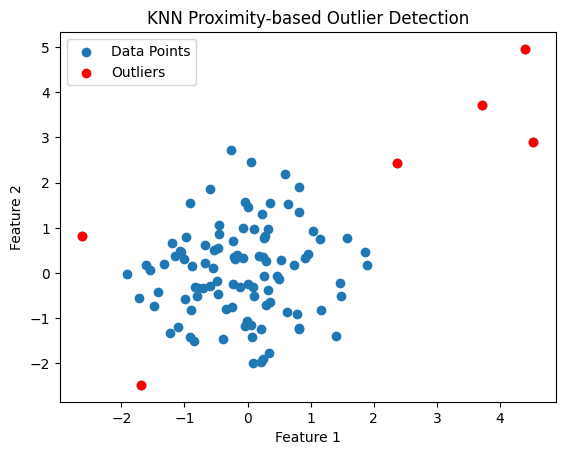

Detected Outliers:
 [[-2.6197451   0.8219025 ]
 [ 4.52847686  2.88922341]
 [ 2.36418889  2.42980901]
 [-1.68610619 -2.47689787]
 [ 3.71233387  3.72136074]
 [ 4.40486782  4.95888663]]


In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Generate sample data with outliers
np.random.seed(42)
# Generate 100 normal data points
X = np.random.normal(0, 1, (100, 2))

# Add some outliers
outliers = np.random.uniform(low=-6, high=6, size=(5, 2))
X = np.vstack([X, outliers])

# Fit the KNN model
k = 5  # Number of neighbors
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Calculate distances to the k-nearest neighbors
distances, _ = knn.kneighbors(X)

# The outlier score can be the distance to the k-th nearest neighbor (max distance)
outlier_scores = distances[:, -1]

# Set a threshold to identify outliers (e.g., top 5% farthest points)
threshold = np.percentile(outlier_scores, 95)
outliers = X[outlier_scores > threshold]

# Plot the results
plt.scatter(X[:, 0], X[:, 1], label='Data Points')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.title('KNN Proximity-based Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print detected outliers
print("Detected Outliers:\n", outliers)

Local Outlier Factor (LOF)

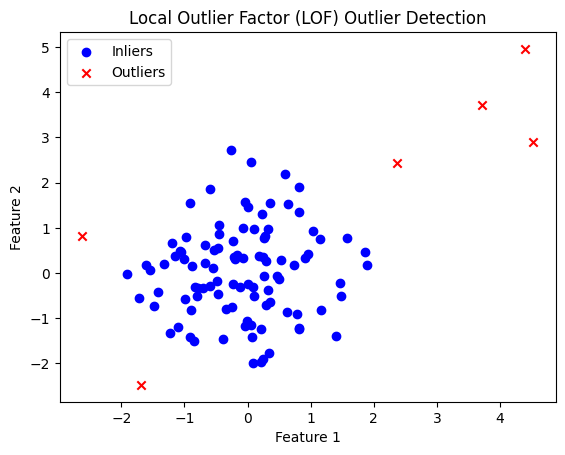

Detected Outliers:
 [[-2.6197451   0.8219025 ]
 [ 4.52847686  2.88922341]
 [ 2.36418889  2.42980901]
 [-1.68610619 -2.47689787]
 [ 3.71233387  3.72136074]
 [ 4.40486782  4.95888663]]


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Generate sample data with outliers
np.random.seed(42)
# Generate 100 normal data points
X = np.random.normal(0, 1, (100, 2))

# Add some outliers
outliers = np.random.uniform(low=-6, high=6, size=(5, 2))
X = np.vstack([X, outliers])

# Fit the LOF model
# n_neighbors: Number of neighbors to use in calculating the LOF score
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# LOF assigns -1 to outliers and 1 to inliers
outliers_detected = X[y_pred == -1]
inliers_detected = X[y_pred == 1]

# Plot the results
plt.scatter(inliers_detected[:, 0], inliers_detected[:, 1], label='Inliers', color='blue')
plt.scatter(outliers_detected[:, 0], outliers_detected[:, 1], label='Outliers', color='red', marker='x')
plt.title('Local Outlier Factor (LOF) Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print the detected outliers
print("Detected Outliers:\n", outliers_detected)